In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style='whitegrid')


### Loading the imdb data

In [4]:
basics = pd.read_csv(r'C:\Users\HP\Documents\AUCA\Big data\Capstone project\datasets\00\title.basics.tsv.gz', sep='\t', na_values='\\N')

ratings = pd.read_csv(r'C:\Users\HP\Documents\AUCA\Big data\Capstone project\datasets\00\title.ratings.tsv.gz', sep='\t', na_values='\\N')



C:\Users\HP\AppData\Local\Temp\ipykernel_16376\3501026107.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv(r'C:\Users\HP\Documents\AUCA\Big data\Capstone project\datasets\00\title.basics.tsv.gz', sep='\t', na_values='\\N')


In [5]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short


In [6]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2165
1,tt0000002,5.5,296
2,tt0000003,6.5,2226
3,tt0000004,5.3,190
4,tt0000005,6.2,2964


In [7]:
#Filtering to include only feature-length movies
movies = basics[basics['titleType'] == 'movie' ]

In [8]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,NaN,100.0,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,Drama


In [9]:
#Dropping entries with missing year, runtime, genres
movies = movies.dropna(subset=['startYear','runtimeMinutes','genres'])

In [10]:
#Converting StartYear and runtime to numeric values
movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')
movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'], errors='coerce')

In [11]:
#Dropping any rows with invalid years or runtime
movies = movies.dropna(subset=['startYear','runtimeMinutes'])

In [12]:
movies[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']].head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,1894.0,45.0,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897.0,100.0,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,1906.0,70.0,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907.0,90.0,Drama
672,tt0000679,The Fairylogue and Radio-Plays,1908.0,120.0,"Adventure,Fantasy"


### **Merging *"basics"* with *"ratings"***

In [13]:
#Merginf movie metadata with rating data using movie id= 'tconst'
merged = pd.merge(movies, ratings, on='tconst')

In [14]:
merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,Romance,5.4,227
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,"Documentary,News,Sport",5.3,563
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"Action,Adventure,Biography",6.0,1007
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,Drama,5.4,33
4,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908.0,NaN,120.0,"Adventure,Fantasy",5.0,80


### **Exploratory Data Analysis (EDA)**

In [15]:
merged.describe()

,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
count,293372.000000,293372.000000,0.0,293372.000000,293372.000000,2.933720e+05
mean,0.013590,1996.854308,NaN,94.555336,6.141636,4.131756e+03
std,0.115783,26.076051,NaN,179.816008,1.351068,3.941539e+04
min,0.000000,1894.000000,NaN,1.000000,1.000000,5.000000e+00
25%,0.000000,1981.000000,NaN,80.000000,5.300000,2.400000e+01
50%,0.000000,2008.000000,NaN,91.000000,6.200000,8.200000e+01
75%,0.000000,2017.000000,NaN,103.000000,7.100000,4.090000e+02
max,1.000000,2025.000000,NaN,59460.000000,10.000000,3.076688e+06


In [16]:
merged.shape

(293372, 11)

In [17]:
merged.isnull().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear              0
endYear           293372
runtimeMinutes         0
genres                 0
averageRating          0
numVotes               0
dtype: int64

### Average IMDb Rating Over Time

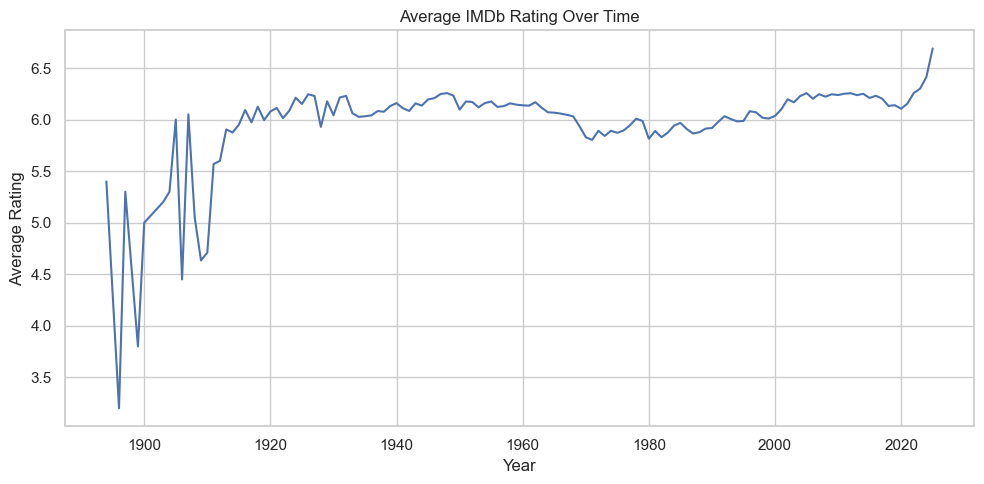

In [18]:
# Grouping by year and calculating average rating
avg_rating_year = merged.groupby('startYear')['averageRating'].mean()

plt.figure(figsize=(10,5))
avg_rating_year.plot()
plt.title('Average IMDb Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Rating by Genre

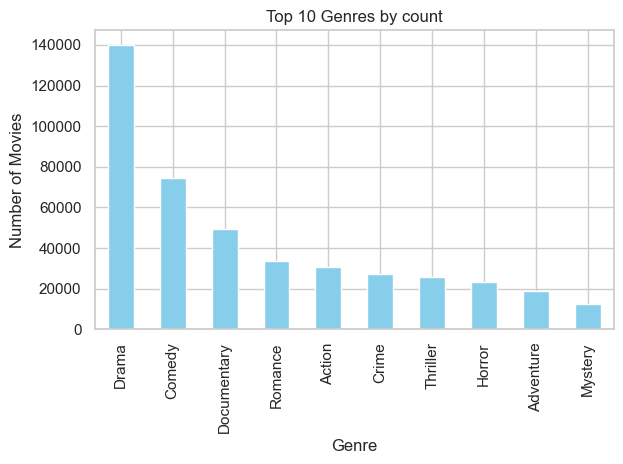

In [19]:
from collections import Counter

#Splitting genres and flattening the list
genre_series = merged['genres'].dropna().str.split(',')
flat_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False)

genre_counts.head(10).plot(kind='bar', title='Top 10 Genres by count', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

### Relationship: Runtime vs Rating

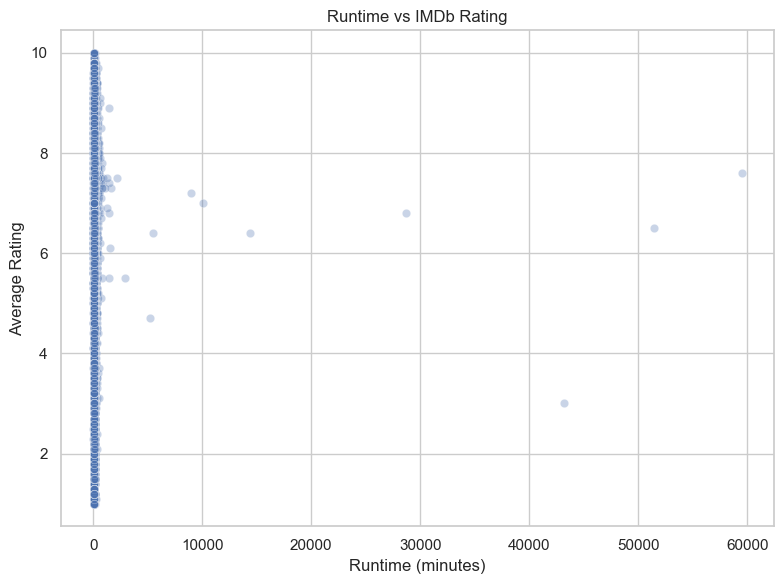

In [20]:
#Do longer movies tend to receive higher ratings?

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='runtimeMinutes', y='averageRating', alpha=0.3)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

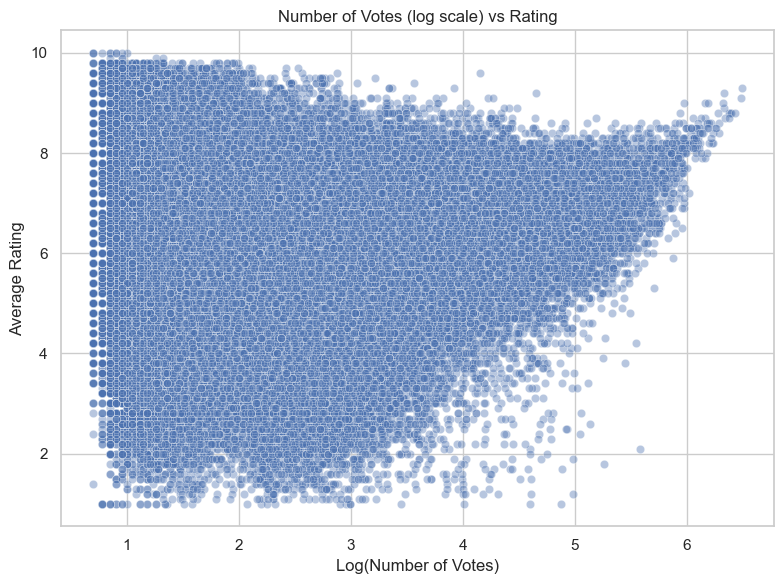

In [21]:
#Converting numVotes to a logarithmic scale to the distribution more interpretable on a plot
import numpy as np

merged['logVotes'] = merged['numVotes'].apply(lambda x: np.log10(x) if x>0 else 0)

plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='logVotes', y='averageRating', alpha=0.4)

plt.title('Number of Votes (log scale) vs Rating')
plt.xlabel('Log(Number of Votes)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

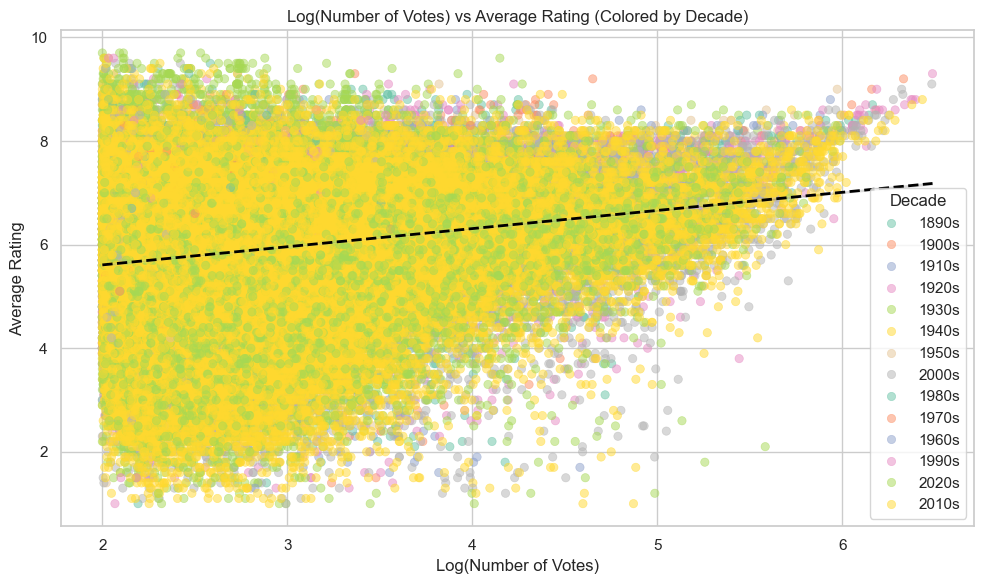

In [ ]:

# Ensuring logVotes is calculated correctly
merged['logVotes'] = merged['numVotes'].apply(lambda x: np.log10(x) if x > 0 else 0)

# Creating a decade column for grouping
merged['decade'] = (merged['startYear'] // 10 * 10).astype('Int64').astype(str) + 's'

#keeping movies with at least 100 votes
filtered = merged[merged['numVotes'] >= 100]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered,
    x='logVotes',
    y='averageRating',
    hue='decade',            # Color by decade
    alpha=0.5,
    palette='Set2',
    edgecolor=None
)

# Adding a trendline
sns.regplot(
    data=filtered,
    x='logVotes',
    y='averageRating',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'linestyle': 'dashed'}
)

plt.title('Log(Number of Votes) vs Average Rating (Colored by Decade)')
plt.xlabel('Log(Number of Votes)')
plt.ylabel('Average Rating')
plt.legend(title='Decade')
plt.tight_layout()
plt.show()


## **Building a simple ML model**

Using Logistic Regression, we are trying to predict whether a movie is higly rated using:

    - startYear
    - runtimeMinutes


In [23]:
#Creating a target variable
#Creating a binary target where 1 = High Rated (>=7), 0 = Low Rated (<7)
merged['highRated'] = (merged['averageRating'] >= 7).astype(int)

#Showing value counts
merged['highRated'].value_counts(normalize=True)

highRated
0    0.719895
1    0.280105
Name: proportion, dtype: float64

In [31]:
#Selecting features
features = merged[['runtimeMinutes', 'startYear','numVotes']]
target = merged['highRated']

In [32]:
#Scaling the features to help normalize the feature ranges
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit-transform on all features
scaled_features = scaler.fit_transform(features)

In [33]:
#Splitting the data
from sklearn.model_selection import train_test_split

#Splitting data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [34]:
#Training the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Initializing and training the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Evaluating the model:

In [36]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18597 23643]
 [ 4641 11794]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57     42240
           1       0.33      0.72      0.45     16435

    accuracy                           0.52     58675
   macro avg       0.57      0.58      0.51     58675
weighted avg       0.67      0.52      0.54     58675



## **Model Summary**

A logistic regression model was to classify IMDb movies as either high-rated (≥7) or low-rated, using three features: runtimeMinutes, startYear, and numVotes. Due to class imbalance, we applied class weighting to improve recall.

**Performance Highlights:**
- **Recall (High-Rated):** 72% — strong ability to identify well-received movies
- **Precision (High-Rated):** 33% — trade-off due to class imbalance
- **Accuracy:** 52% — modest overall performance
- **Confusion Matrix:**
  - True Positives: 11,794
  - False Positives: 23,643
  - True Negatives: 18,597
  - False Negatives: 4,641

**Conclusion:**
While precision is limited, the model is effective at identifying high-rated films. This makes it suitable for exploratory analysis or recommendation filtering, especially when recall is more important than precision.

## Exporting Predictions for Power BI

In [37]:
# Creating a DataFrame from the test set with original feature scales
X_test_df = pd.DataFrame(scaler.inverse_transform(X_test), columns=['runtimeMinutes', 'startYear', 'numVotes'])

# Adding actual and predicted labels
X_test_df['actual'] = y_test.values
X_test_df['predicted'] = y_pred

# Saving to CSV for Power BI use
X_test_df.to_csv('imdb_predictions.csv', index=False)

print("Exported test predictions to 'imdb_predictions.csv'.")


Exported test predictions to 'imdb_predictions.csv'.
